Loaded pretrained weights for efficientnet-b0


C:\Users\ajeet\AppData\Local\Temp\ipykernel_30920\2335045927.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  efficientnet_b0.load_state_dict(torch.load('saved_models/Co

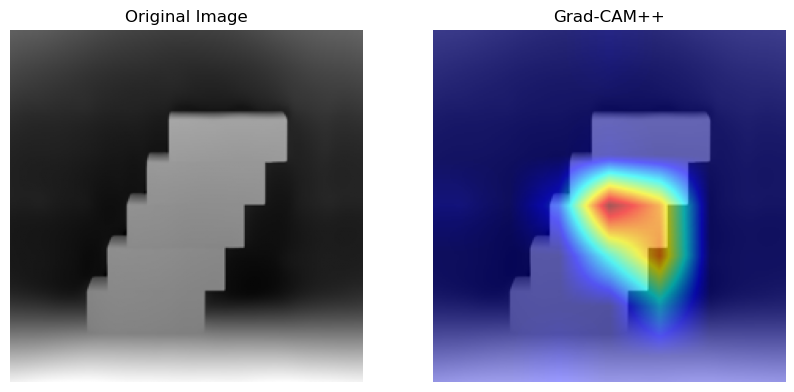

In [14]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image
from pytorch_grad_cam import GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image
from efficientnet_pytorch import EfficientNet

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


efficientnet_b0 = EfficientNet.from_pretrained('efficientnet-b0')
efficientnet_b0._fc = torch.nn.Linear(efficientnet_b0._fc.in_features, 2)

efficientnet_b0.load_state_dict(torch.load('saved_models/Combined-DEPTH.pth', map_location=device))
efficientnet_b0.to(device)
efficientnet_b0.eval()

target_layer = efficientnet_b0._conv_head

cam = GradCAMPlusPlus(model=efficientnet_b0, target_layers=[target_layer])

preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

def apply_gradcam(image_path):
 
    img = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(img).unsqueeze(0).to(device)

    grayscale_cam = cam(input_tensor=input_tensor)[0]

    rgb_img = np.array(img.resize((224, 224))) / 255.0
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(visualization)
    plt.title("Grad-CAM++")
    plt.axis('off')
    plt.show()

apply_gradcam("tmpj9p8ecw0.png")
